# imports

We first import the required modules, `get_star` is the function.

We are going to use and it's availble in the stars module of our trout package, so we import it.

In [1]:
from trout.stars import get_star

In [2]:
# Let's examine star 303
star = get_star(303)

In [3]:
star

Star: 303 Datapoints: 821 Selected: 0

The output in the previous line says that our star 303 has 821 datapoints in the database. 

We are currently selecting 0. The concept of selecting datapoints is helpful when we want to plot the stars data. 

We can only plot the data that we've selected.

### Peek
Let's peek at the data. Peek means to see first few rows of the data.

In [14]:
star.peek()

((1, 13251.0, datetime.date(2003, 6, 18)),
 (2, 13111.0, datetime.date(2003, 6, 19)),
 (3, 13315.0, datetime.date(2003, 6, 20)),
 (4, 13364.0, datetime.date(2003, 6, 28)),
 (5, 13265.0, datetime.date(2003, 6, 29)))

### Headers
What are the column names, we can see that with headers

In [12]:
star.headers

['id', 'flux', 'date']

If we wanted to view all data, we would do 
```
star.data
```


### Plot
Let's try to make a plot of the star data.

In [6]:
star.plot()

Nothing got drawn in the screen because our `selected_data` is empty.

We could check that with 
```
star.selected_data
```

In [7]:
star.selected_data

[]

## Select 
Lets go ahead and select all data so we can make a plot.

In [3]:
star.select()

Star: 303 Datapoints: 821 Selected: 821

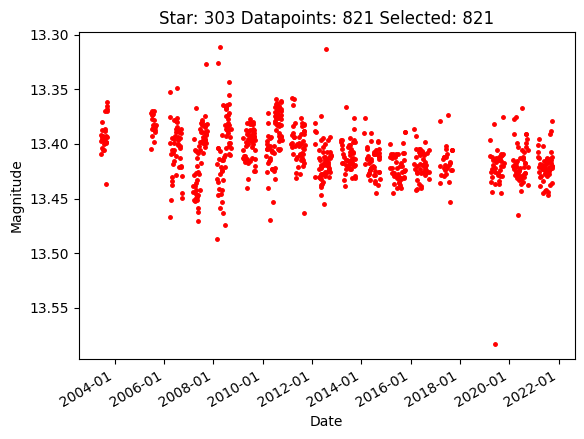

In [4]:
# Making a plot is easy, just call the plot function in the star
star.plot()

# For a custom title, we could have said
# star.plot("Star 303 from 2004 to 2021")

### More select 
What if we wanted to see a plot for data just between 2010 and 2015?

In [5]:
# We can use that using more advanced form of select.
star.select("date > '2010-01-01' and date < '2015-01-01'")

Star: 303 Datapoints: 821 Selected: 281

In [6]:
# Let's look at the `selected_data` to get some sense of whether that worked.
# star.peek() would give you the peek of the entire dataset, so you would 
# have to use `selected_data` here. 
# But let's just limit the output to first 5 rows ourselves to prevent 
# long output.
star.selected_data[:5]

((367, 13087.0, datetime.date(2010, 2, 20)),
 (368, 13248.0, datetime.date(2010, 2, 27)),
 (369, 13220.0, datetime.date(2010, 3, 2)),
 (370, 13167.0, datetime.date(2010, 3, 3)),
 (371, 13169.0, datetime.date(2010, 3, 4)))

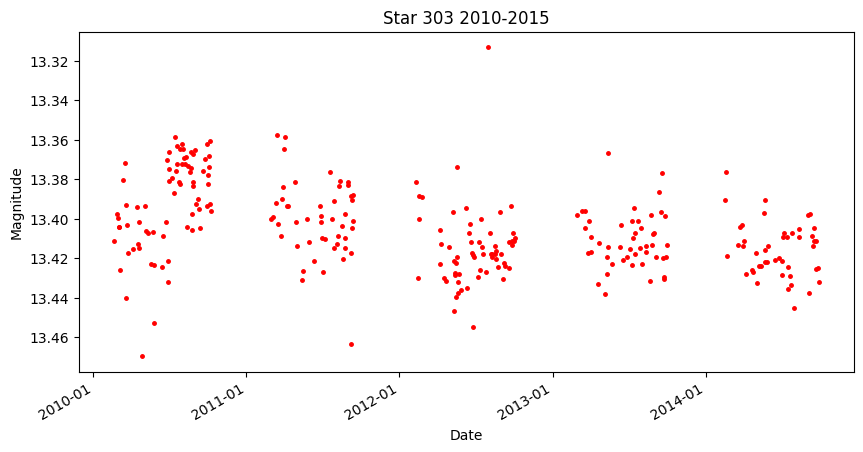

In [7]:
# If we plot now, we will only get `selected_data` in the plot.
star.plot("Star 303 2010-2015")

### Some more select

Lets try to get rid of the outlier point around end of 2012 (mag around 13.32).

This time we want to filter by flux. But first we need know the corresponding flux value of that magnitude.

In [9]:
# We import our conversion function
from trout.conversions import mag_4px_to_flux

In [10]:
mag_4px_to_flux(13.32)

14182.460020795725

In [67]:
# We now modify our previous select function for further filtering
star.select("date > '2010-01-01' and date < '2015-01-01' and flux < 14182")

Star: 303 Datapoints: 821 Selected: 280

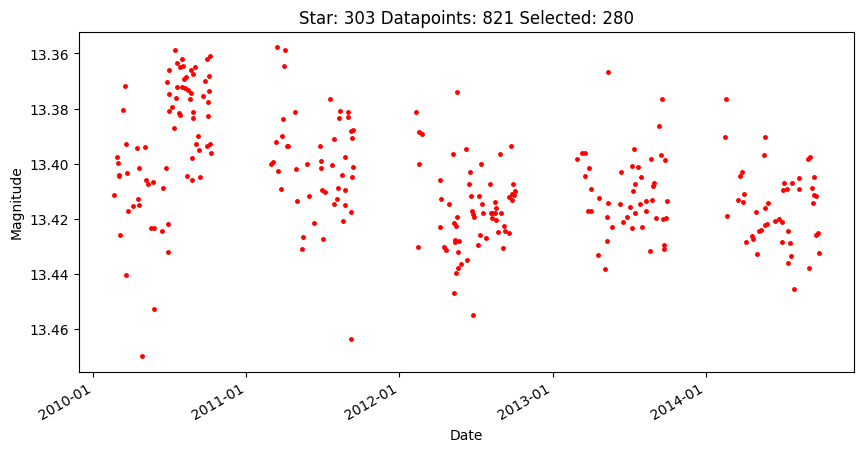

In [58]:
# Hopefully we got rid of that point now.
star.plot()

### Transformation
Say we want to scale up or down some data, and see how that compares now.

We can do that with `transform_selected` method defined for a `Star` object. 

We can use a transformation function to transform `selected_data`. 

How exactly does this work? We can use the `help` function to see the manual 
for the function.

#### Using Help

In [17]:
help(star.transform_selected)

Help on method transform_selected in module trout.stars.star:

transform_selected(flux_transformation_fn=<function Star.<lambda> at 0x7f5e6111bc10>) method of trout.stars.star.Star instance
    Transform the flux with some transformation function provided.
    Note that this ony alters the selected_data field. 
    If you want to reset the data, just call the select method without any
    parameters.
    
    param: flux_transformation_fn: Function that takes old data (tuple of
        id, flux value and date) and returns new flux value. 
        Its default value is identify function in the sense that it leaves the 
        flux value unaltered. Technically it is a function that take a tuple and
        returns item in the second position (which is where flux is stored)
    return: the transformed dataset
    
    Examples:
    Say you want to double the magnitude of all datapoints taken before 2009
    feb and keep the magnitude of other datapoints intact, you would then write
    yo

We could have used the `help` function for other functions too. 

You could try

```
help(star.plot)
help(star.select)
```

The help manual is coming from where the source code lives. So, if you want to make chages, you would have to edit the manual in the source code.

In [68]:
# Our transformation function is going to scale up the flux values for dates greater than 2012 by 1.05
# As you can imagine you can write your own logic for this
def transform(data):
    sn, flux, date = data
    import datetime
    if date > datetime.date(2012, 1, 1):
        return flux * 1.05
    else:
        return flux

In [69]:
# Now we call the method to transform with our transformation function
star.transform_selected(transform)

In [70]:
# Datapoints aren't altered
star

Star: 303 Datapoints: 821 Selected: 280

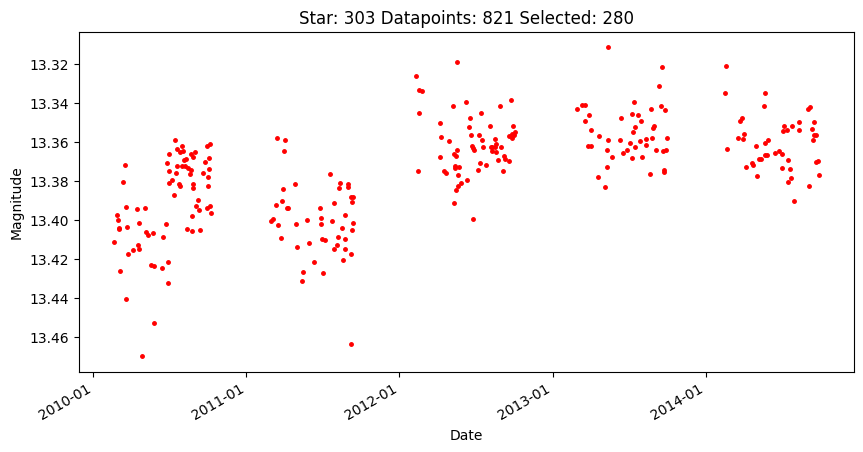

In [71]:
# Let's plot to see what difference it made
star.plot()

## IMPORTANT

Note that if you call the transformation function twice, the same transformation will be applied twice. 

If you did it by accident, call the select function again to reset back to untransformed dataset.

Happy Trout Analysis

To know what any function does exactly, please refer to source code:
https://github.com/LutherAstrophysics/analysis